# مقدمه ای برای رگرسیون
 تو این پروژه ما رگرسیون به سبک خیلی سنتی و با کتابخونه نامپای رو واکاوی می کنیم و به این نتیجه می رسیم که نیازی به کتابخونه و روش های قوی تری برای حل مسائل واقعی تر داریم


## فراخوانی کتابخانه ها

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## درباره دیتا
این دیتا میگه به ازای چقدر خرج کردن در پلتفرم های مختلف، یعنی تلوزیون، رادیو و روزنامه، چه قدر فروش داشتیم


In [26]:
df = pd.read_csv("Advertising.csv")

In [27]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**آیا رابطه ای بین کل مخارج تبلیغات و مقدار فروش وجود دارد؟**

In [28]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

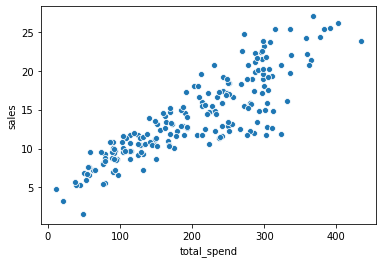

In [29]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Least Squares Line



دنبال خطی می گردیم که به بهترین وجه ممکن نزدیک به همه داده ها باشه. یادمون باشه که خطی نداریم که به طور مطلق روی همه داده ها فیت بشه پس خطی رو پیدا می کنیم که کمترین فاصله رو از همه داده ها داشته باشه


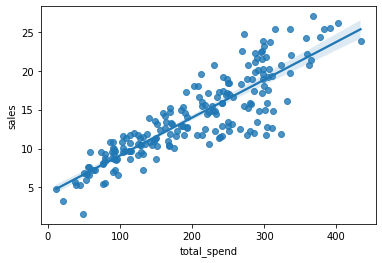

In [30]:
# به عبارت دیگه ما می خوایم به معادله این خط برسیم
sns.regplot(x='total_spend',y='sales',data=df)

معادله خط ساده به این شکله و کتابخونه زیر از نامپای می تونه پارامتر های این معادله رو برامون پیدا کنه $$y=mx+b$$

In [31]:
X = df['total_spend']
y = df['sales']

In [32]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [33]:
# به این صورت نامپای ضرایبت رو برامون پیدا می کنه. پارامتر سوم هم توان متغیر رو نشون میده
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [34]:
# چند تا ورودی جدید برای تابع تشکیل می دیم تا در ادامه و با کمک معادله بتونیم اون رو رسم کنیم
potential_spend = np.linspace(0,500,100)

In [35]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

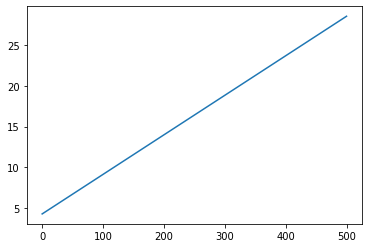

In [36]:
plt.plot(potential_spend,predicted_sales)

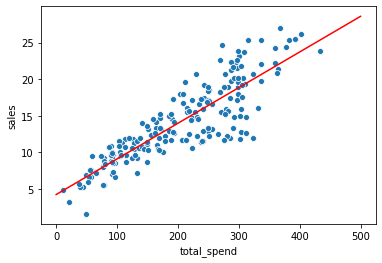

In [37]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**حالا یه سوال، فرض کنین سال بعد قراره 200 دلار خرج کنیم! چه قدر فروش خواهیم داشت؟**

In [38]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [39]:
predicted_sales

13.98060422

# چالش های پیش رو

## Overfitting, Underfitting, and Measuring Performance

تا الان توان رو 1 در نظر گرفتیم یا به عبارتی با یه خط ساده  روبه رو بودیم؛ اما اگر توان رو بیشتر کنیم چی؟ آیا پیچیده تر شدن مسئله لزوما به معنی بهتر پیشبینی کردن مدل در آینده هست؟ چجوری می تونیم مدلمون رو ارزیابی کنیم تا از کارکرد صحیحش مطمئن تر بشیم؟

برای مثال بیاین توان رو به 3 تغییر بدیم

In [40]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [41]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [42]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

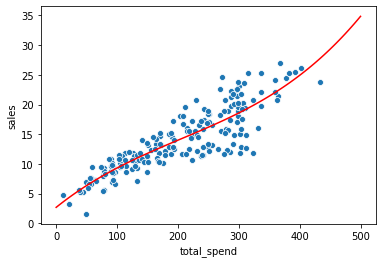

In [43]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**بنابرین هر الگوریتمی می تونه بی نهایت خروجی متفاوت به ما بده اما سوال اصلی-->آیا این مدل از مدل قبلی که یه خط ساده بود بهتره؟**

## مسائل چند متغیره

مسئله واقعی ما در این مثال سه متغیر داشت اما ما اونا رو با هم جمع و تبدیل به یه متغیر کردیم! بیاین از این کتابخونه برای هر سه متغیر استفاده کنیم

In [44]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [45]:
# Note here we're passing in 3 which matches up with 3 unique features, so we're not polynomial yet
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**به ارور بر خوردیم! پس برای مسائل با چند متغیر نیاز به کتابخونه ی قوی تری داریم! که در ادامه باهاش آشنا خواهیم شد**

-------
--------